In [1]:
import os
from glob import glob

from astropy.io import fits, ascii
from astropy.table import Table, hstack
import fitsio

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from cycler import cycler
plt.rcParams.update({
    'figure.figsize'   : (12, 10),
    'font.family'      :'serif',
    'font.size'        : 24,
    'font.serif'       :'Georgia',
    'axes.labelsize'   :'large',
    'mathtext.fontset' :'stix',
    'axes.linewidth'   : 5,
    'xtick.direction'  :'in',
    'ytick.direction'  :'in',
    'xtick.major.size' : 7,
    'ytick.major.size' : 7,
    'xtick.major.width': 3,
    'ytick.major.width': 3,
    'xtick.minor.size' : 5,
    'ytick.minor.size' : 5,
    'xtick.minor.width': 2,
    'ytick.minor.width': 2,
    'lines.linewidth'  : 3,
    'axes.prop_cycle'  : cycler('color', ['red', 'orange', 'teal', 'skyblue']),
})

def Table_to_array(table):
    tuple_data = table.as_array()
    list_data  = [list(values) for values in tuple_data]
    array_data = np.array(list_data, dtype = np.float32)

    return array_data

def normalized_arrays(x_values, y_values):
    dx = x_values[1:] - x_values[:-1]
    norm_factor = np.sum(y_values[:-1] * dx)
    norm_y_values = y_values/norm_factor
    return x_values, norm_y_values

In [2]:
with fits.open('/data2/lsajkov/mpdg/saved_soms/09Aug24_mag_cut_20p5/predicted_catalog.fits') as cat:
    KiDS_predicted = Table(cat[1].data)

In [3]:
folder = '/data2/lsajkov/mpdg/saved_soms/09Aug24_mag_cut_20p5'
labeled_map = np.load(f'{folder}/labeled_map.npy',
                      allow_pickle = True)
labeled_map_values = np.load(f'{folder}/labeled_map_values.npy',
                      allow_pickle = True)
data_bmus = np.load(f'{folder}/data_bmus.npy',
                      allow_pickle = True)
labeling_bmus = np.load(f'{folder}/labeling_bmus.npy',
                      allow_pickle = True)

In [4]:
images_path = '/disks/shear15/KiDS/KiDS-1000/Awe/images'

In [5]:
mstar_lo = labeled_map[..., 1] < 8.75
mstar_md = (labeled_map[..., 1] >= 8.75) & (labeled_map[..., 1] < 9.5)
mstar_hi = labeled_map[..., 1] >= 9.5

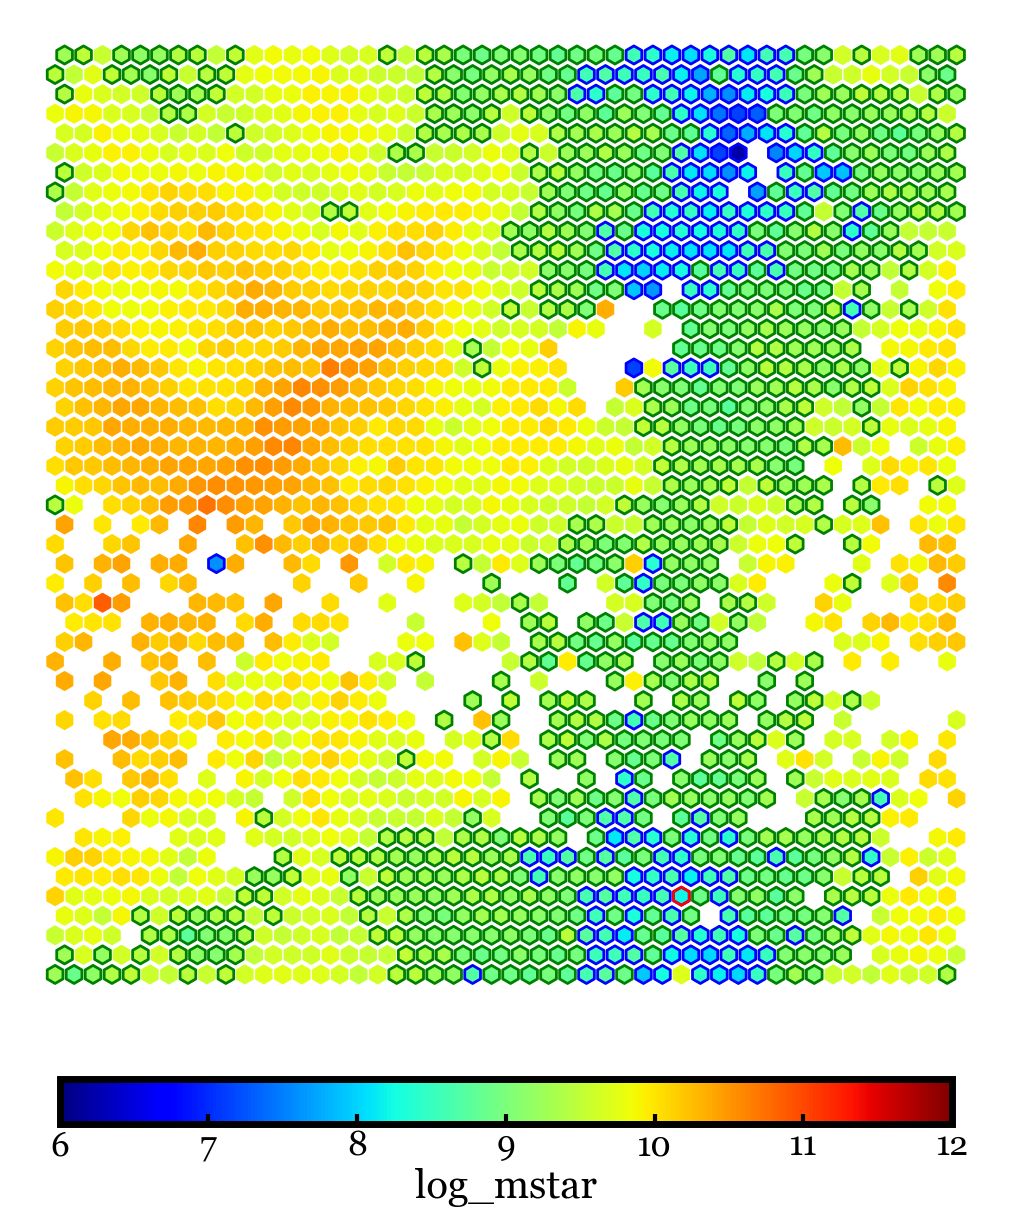

In [6]:
n_rows = 48
n_columns = 48

fig = plt.figure(figsize = (10, 12), constrained_layout = True)

#Visualize labeled SOM
hexmesh = np.meshgrid(np.linspace(0, n_rows - 1, n_rows),
                      np.linspace(0, n_columns - 1, n_columns))

hexmesh[0][1::2] += 1/2

ax = fig.add_subplot()

map = ax.scatter(*hexmesh, c = labeled_map[..., 1], marker = 'h', cmap = 'jet', s = 180,
                    vmin = 6, vmax = 12)

hexmesh_mstar_lo = [hexmesh[0][mstar_lo], hexmesh[1][mstar_lo]]
ax.scatter(*hexmesh_mstar_lo, marker = 'h', facecolor = 'none', edgecolor = 'blue', s = 170, linewidth = 2)

hexmesh_mstar_md = [hexmesh[0][mstar_md], hexmesh[1][mstar_md]]
ax.scatter(*hexmesh_mstar_md, marker = 'h', facecolor = 'none', edgecolor = 'green', s = 170, linewidth = 2)

ax.scatter(33, 4, marker = 'h', facecolor = 'none', edgecolor = 'red', s = 170, linewidth = 2)

ax.axis('off')
fig.colorbar(mappable = map, ax = ax, location = 'bottom', label = 'log_mstar', shrink = 0.9)

In [80]:
np.sum(np.all(data_bmus == [4, 33], axis = 1))

523

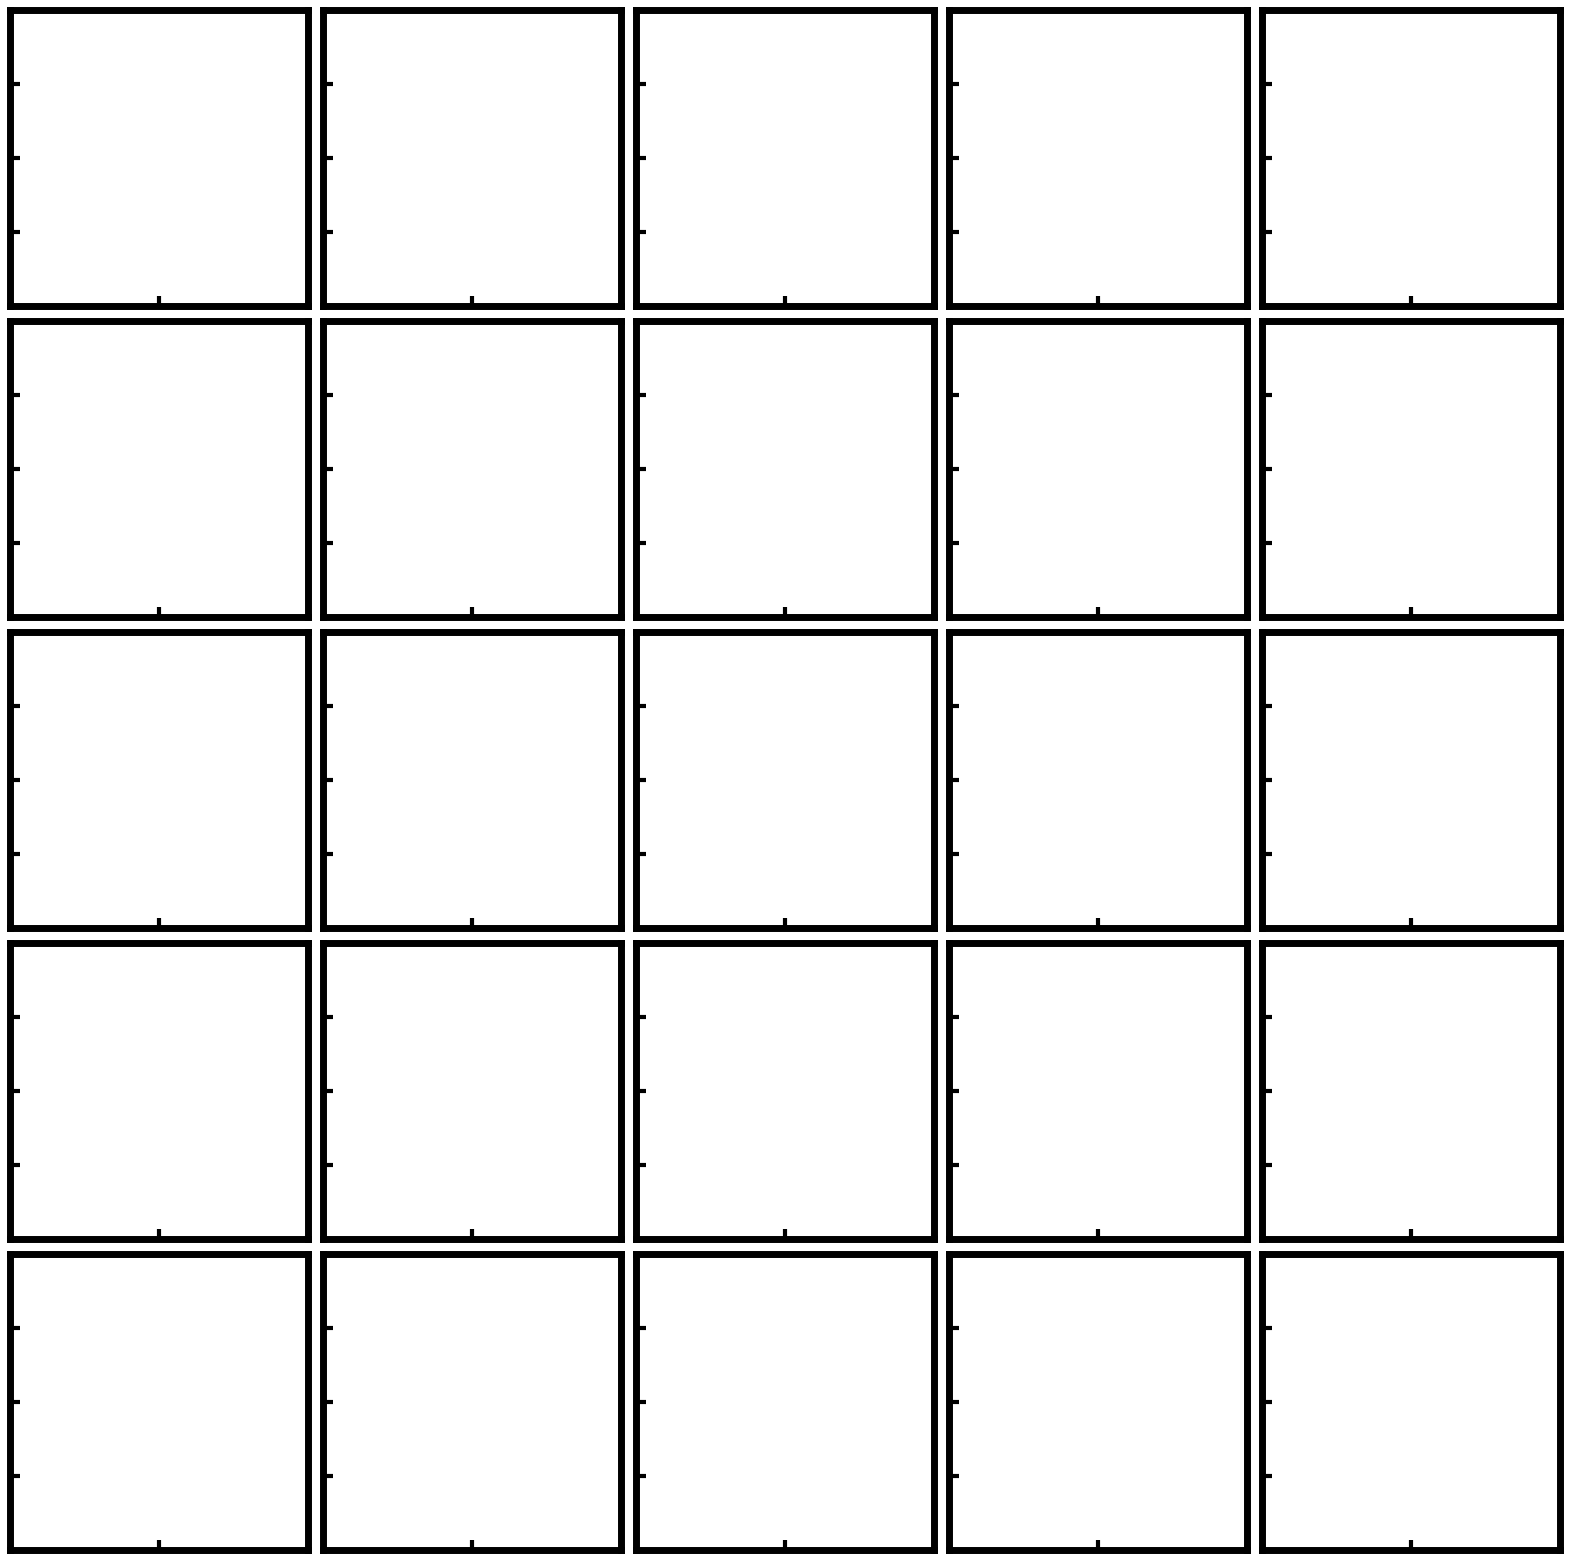

In [7]:
fig = plt.figure(figsize = (20, 20))

image_row = 5
image_col = 5

cell = [4, 33]
source_idx = np.all(data_bmus == [4, 33], axis = 1)
sources = KiDS_predicted[source_idx]

for ii in range(image_row):
    for jj in range(image_col):
        
        ax = fig.add_subplot(5, 5, ii * 5 + jj + 1)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

fig.subplots_adjust(wspace = 0.05, hspace = 0.05)